# Random Forest

## Imports

In [0]:
import pandas as pd
import numpy as np
import sys
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from IPython.display import clear_output

## Progressbar method

In [0]:
def update_progress(progress, length):
    bar_length = 20
    
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1
    
    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)
    
np.set_printoptions(threshold=sys.maxsize)

## Access to gDrive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Wine red quality

### Read the dataset with split 70:30

In [4]:
X_train = np.loadtxt('/content/gdrive/My Drive/ensemble/data/red-0_3/x-train.csv', delimiter=',')
y_train = np.loadtxt('/content/gdrive/My Drive/ensemble/data/red-0_3/y-train.csv', delimiter=',')
X_test = pd.read_csv('/content/gdrive/My Drive/ensemble/data/red-0_3/x_test.csv', sep=',').values
y_test = np.loadtxt('/content/gdrive/My Drive/ensemble/data/red-0_3/y-test.csv', delimiter=',')

print(f'shape of sets: X_train {X_train.shape} | y_train {y_train.shape} | X_test {X_test.shape} | y_test {y_test.shape}')

shape of sets: X_train (1119, 11) | y_train (1119,) | X_test (480, 11) | y_test (480,)


### Classification




#### Chart of accuracy based on various number of estimators in ensemble model with bootstrap


In [5]:
train_acc_list = []
test_acc_list = []
max_estimators = 300
min_estimators = 250

update_progress(min_estimators / max_estimators, max_estimators)

for i in range(min_estimators, max_estimators):
    rf_clf = RandomForestClassifier(n_estimators=i, bootstrap=True, n_jobs=-1, oob_score=True)
    rf_clf.fit(X_train, y_train)

    train_acc = rf_clf.oob_score_

    y_pred = rf_clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    
    update_progress(i / max_estimators, max_estimators)
    
update_progress(max_estimators, max_estimators)
print('done!')

Progress: [####################] 100.0%
done!


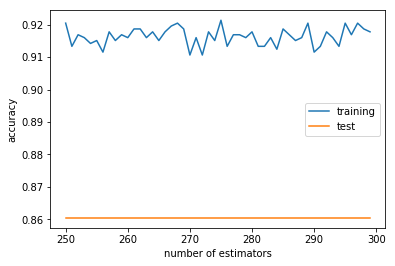

In [8]:
plt.plot(range(min_estimators, max_estimators), train_acc_list, label='training')
plt.plot(range(min_estimators, max_estimators), test_acc_list, label='test')
plt.xlabel('number of estimators')
plt.ylabel('accuracy')


plt.legend()
# plt.title('Dokładność modelu w zależności od liczby estymatorów przy podziale danych 70:30')
plt.savefig('/content/gdrive/My Drive/ensemble/charts/wine-red_03_estimators_rf.png')
plt.show()

#### Details of the used clasificator

In [7]:
print(f'ensemble model: {rf_clf} | base estimator: {rf_clf.base_estimator}')

ensemble model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=299,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False) | base estimator: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


### Read the dataset with split 80:20

In [9]:
X_train = np.loadtxt('/content/gdrive/My Drive/ensemble/data/red-0_2/x-train.csv', delimiter=',')
y_train = np.loadtxt('/content/gdrive/My Drive/ensemble/data/red-0_2/y-train.csv', delimiter=',')
X_test = pd.read_csv('/content/gdrive/My Drive/ensemble/data/red-0_2/x_test.csv', sep=',').values
y_test = np.loadtxt('/content/gdrive/My Drive/ensemble/data/red-0_2/y-test.csv', delimiter=',')

print(f'shape of sets: X_train {X_train.shape} | y_train {y_train.shape} | X_test {X_test.shape} | y_test {y_test.shape}')

shape of sets: X_train (1119, 11) | y_train (1119,) | X_test (480, 11) | y_test (480,)


### Classification

In [10]:
train_acc_list = []
test_acc_list = []
max_estimators = 300
min_estimators = 250

update_progress(min_estimators / max_estimators, max_estimators)

for i in range(min_estimators, max_estimators):
    rf_clf = RandomForestClassifier(n_estimators=i, bootstrap=True, n_jobs=-1, oob_score=True)
    rf_clf.fit(X_train, y_train)

    train_acc = rf_clf.oob_score_

    y_pred = rf_clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    
    update_progress(i / max_estimators, max_estimators)
    
update_progress(max_estimators, max_estimators)
print('done!')

Progress: [####################] 100.0%
done!


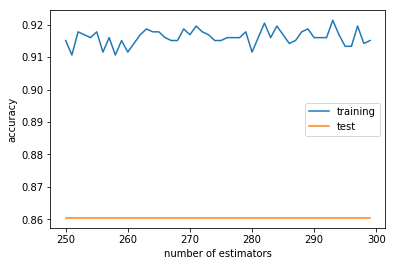

In [11]:
plt.plot(range(min_estimators, max_estimators), train_acc_list, label='training')
plt.plot(range(min_estimators, max_estimators), test_acc_list, label='test')
plt.xlabel('number of estimators')
plt.ylabel('accuracy')


plt.legend()
plt.savefig('/content/gdrive/My Drive/ensemble/charts/wine-red_02_estimators_rf.png')
plt.show()

### Read the dataset with split 60:40

In [12]:
X_train = np.loadtxt('/content/gdrive/My Drive/ensemble/data/red-0_4/x-train.csv', delimiter=',')
y_train = np.loadtxt('/content/gdrive/My Drive/ensemble/data/red-0_4/y-train.csv', delimiter=',')
X_test = pd.read_csv('/content/gdrive/My Drive/ensemble/data/red-0_4/x_test.csv', sep=',').values
y_test = np.loadtxt('/content/gdrive/My Drive/ensemble/data/red-0_4/y-test.csv', delimiter=',')

print(f'shape of sets: X_train {X_train.shape} | y_train {y_train.shape} | X_test {X_test.shape} | y_test {y_test.shape}')

shape of sets: X_train (959, 11) | y_train (959,) | X_test (640, 11) | y_test (640,)


### Classification

In [13]:
train_acc_list = []
test_acc_list = []
max_estimators = 300
min_estimators = 250

update_progress(min_estimators / max_estimators, max_estimators)

for i in range(min_estimators, max_estimators):
    rf_clf = RandomForestClassifier(n_estimators=i, bootstrap=True, n_jobs=-1, oob_score=True)
    rf_clf.fit(X_train, y_train)

    train_acc = rf_clf.oob_score_

    y_pred = rf_clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    
    update_progress(i / max_estimators, max_estimators)
    
update_progress(max_estimators, max_estimators)
print('done!')

Progress: [####################] 100.0%
done!


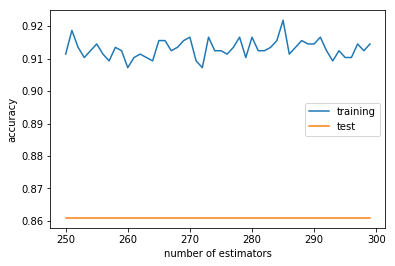

In [14]:
plt.plot(range(min_estimators, max_estimators), train_acc_list, label='training')
plt.plot(range(min_estimators, max_estimators), test_acc_list, label='test')
plt.xlabel('number of estimators')
plt.ylabel('accuracy')


plt.legend()
plt.savefig('/content/gdrive/My Drive/ensemble/charts/wine-red_04_estimators_rf.png')
plt.show()